<a href="https://colab.research.google.com/github/audreyemmely/pln/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Conjunto de dados de classificação de gênero IMDb](https://www.kaggle.com/hijest/genre-classification-dataset-imdb)

IMDb (um acrônimo para Internet Movie Database) é uma base de dados online de informação relacionada a filmes, programas de televisão, vídeos caseiros, jogos, e conteúdos de streaming online - incluindo elenco, equipe de produção e biografias pessoais, resumos de tramas, classificações, e críticas de fãs e críticos. 

Desde Dezembro de 2020, IMDb tem aproximadamente 7,5 milhões de títulos (incluindo episódios) e 10,4 milhões de personalidades na sua base de dados, bem como 83 milhões de utilizadores registrados.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
train_df = pd.read_csv('train_data.txt', sep =':::', header = None, engine = 'python')
train_df.columns = ['id', 'title', 'genre', 'description']

In [ ]:
train_df.head()

,id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
test_df = pd.read_csv('test_data_solution.txt', sep = ':::', header = None, engine = 'python')
test_df.columns = ['id', 'title', 'genre', 'description']

In [ ]:
test_df.head()

,id,title,genre,description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [ ]:
data_type = {0: 'train_data', 1: 'test_data'}

for i, df in enumerate([train_df, test_df]):
  print(f'Dataset "{data_type[i]}" info:')
  print(df.info())
  print('Number of unique genres: ', df['genre'].nunique())
  print('='*42)
  print('\n')

Dataset "train_data" info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
Number of unique genres:  27


Dataset "test_data" info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           54200 non-null  int64 
 1   title        54200 non-null  object
 2   genre        54200 non-null  object
 3   description  54200 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None
Number of unique genres:  27




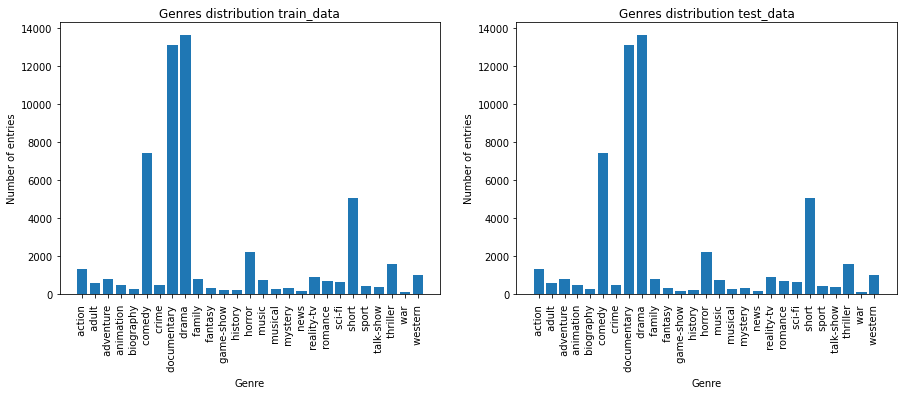

In [ ]:
plt.figure(figsize=(15,5))
for i, df in enumerate([train_df, test_df]):
  data = df.groupby('genre').count()
  plt.subplot(1, 2, i+1)
  plt.bar(data.index, data['id'])
  plt.xlabel('Genre')
  plt.ylabel('Number of entries')
  plt.title(f'Genres distribution {data_type[i]}')
  plt.xticks(rotation=90)
plt.show()
del data_type


Assim, temos:


*   54214 registros de filmes/programas de televisão em "train_data"
*   54200 registros de filmes/programas de televisão em "test_data"
*   27 gêneros diferentes no total
*   os registros são distribuídos de forma desigual por gênero (em alguns     gêneros tem mais de 13k filmes e em outros um pouco mais de 100) - portanto, pode-se esperar que alguns gêneros não sejam identificados corretamente
